In [10]:
import pandas as pd

data = pd.read_csv("/workspaces/linear-regression-project-tutorial_if/data/medical_insurance_cost.csv")


In [66]:
data = data.dropna()
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   sex_n     1337 non-null   int64  
 8   smoker_n  1337 non-null   int64  
 9   region_n  1337 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


AttributeError: 'list' object has no attribute 'list'

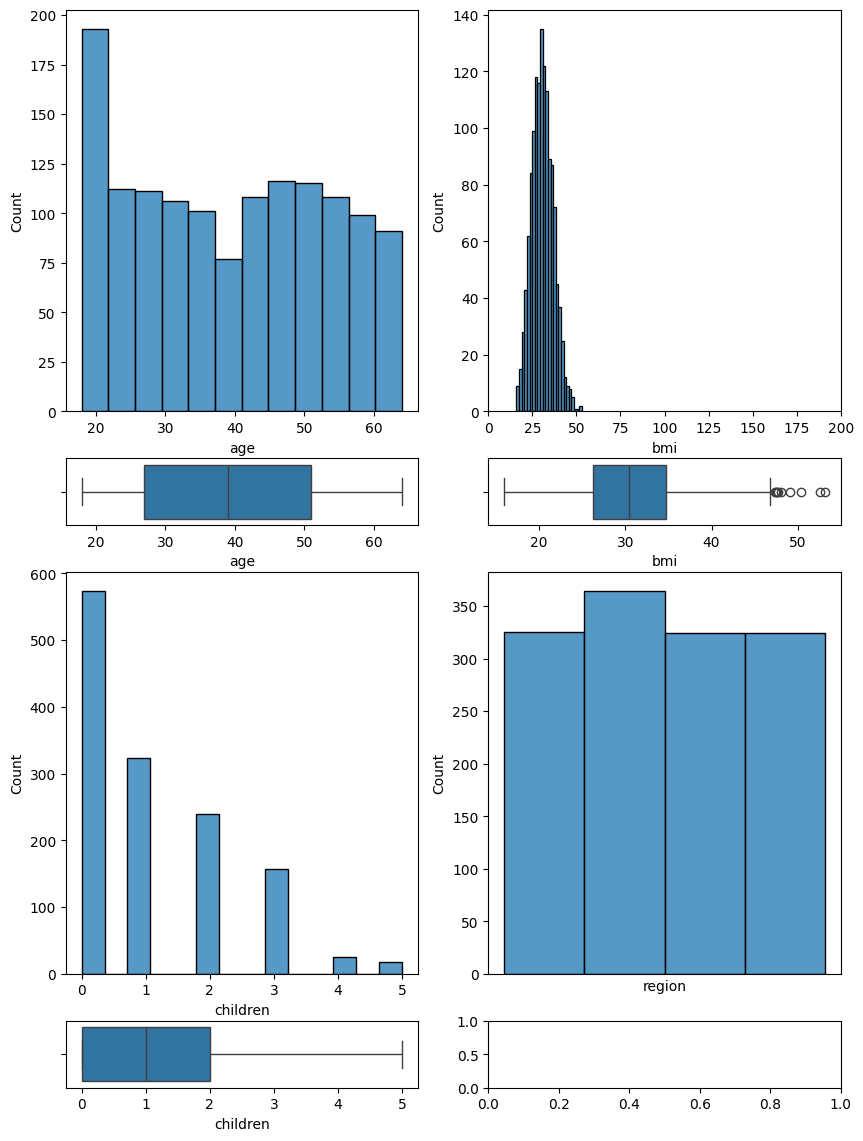

In [67]:
import matplotlib.pyplot as plt 
import seaborn as sns
#Not neccessary
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")

sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")

sns.histplot(ax = axis[2,1], data = data, x = "region").set_xticks([]).list(xticks)
sns.boxplot(ax = axis[3, 1], data = data, x = "region")

sns.histplot(ax = axis[2,1], data = data, x = "smoker")
sns.boxplot(ax = axis[3, 1], data = data, x = "smoker")

sns.histplot(ax = axis[2,1], data = data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = data, x = "charges")


plt.tight_layout()
plt.show()

In [69]:
#add 1hot coding for "sex_n", "smoker_n", "region_n"
#split the set first

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = data.drop("charges", axis = 1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

ValueError: could not convert string to float: 'male'

In [48]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]
data["region_n"] = pd.factorize(data["region"])[0]
num_variables = ["age", "bmi", "children", "charges"]


scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()
data_scal.describe()

,age,bmi,children,sex_n,smoker_n,region_n,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.461351,0.395573,0.219147,0.504862,0.795064,0.494640,0.194055
std,0.305312,0.164123,0.241114,0.500163,0.403806,0.368403,0.193306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.277912,0.000000,0.000000,1.000000,0.333333,0.057854
50%,0.456522,0.388485,0.200000,1.000000,1.000000,0.333333,0.131915
75%,0.717391,0.504170,0.400000,1.000000,1.000000,0.666667,0.247984
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [10]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("data/train/clean_train.csv", index = False)
X_test_sel.to_csv("data/test/clean_test.csv", index = False)
X_test_sel.head()

,age,bmi,children,smoker_n,charges
0,0.673913,0.176352,0.0,1.0,0.120785
1,0.239130,0.259349,0.8,1.0,0.073218
2,0.717391,0.549502,0.6,1.0,0.164646
3,0.282609,0.495830,0.6,0.0,0.600564
4,0.282609,0.603444,0.4,1.0,0.053335


In [11]:
train_data = pd.read_csv("data/train/clean_train.csv")
test_data = pd.read_csv("data/test/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


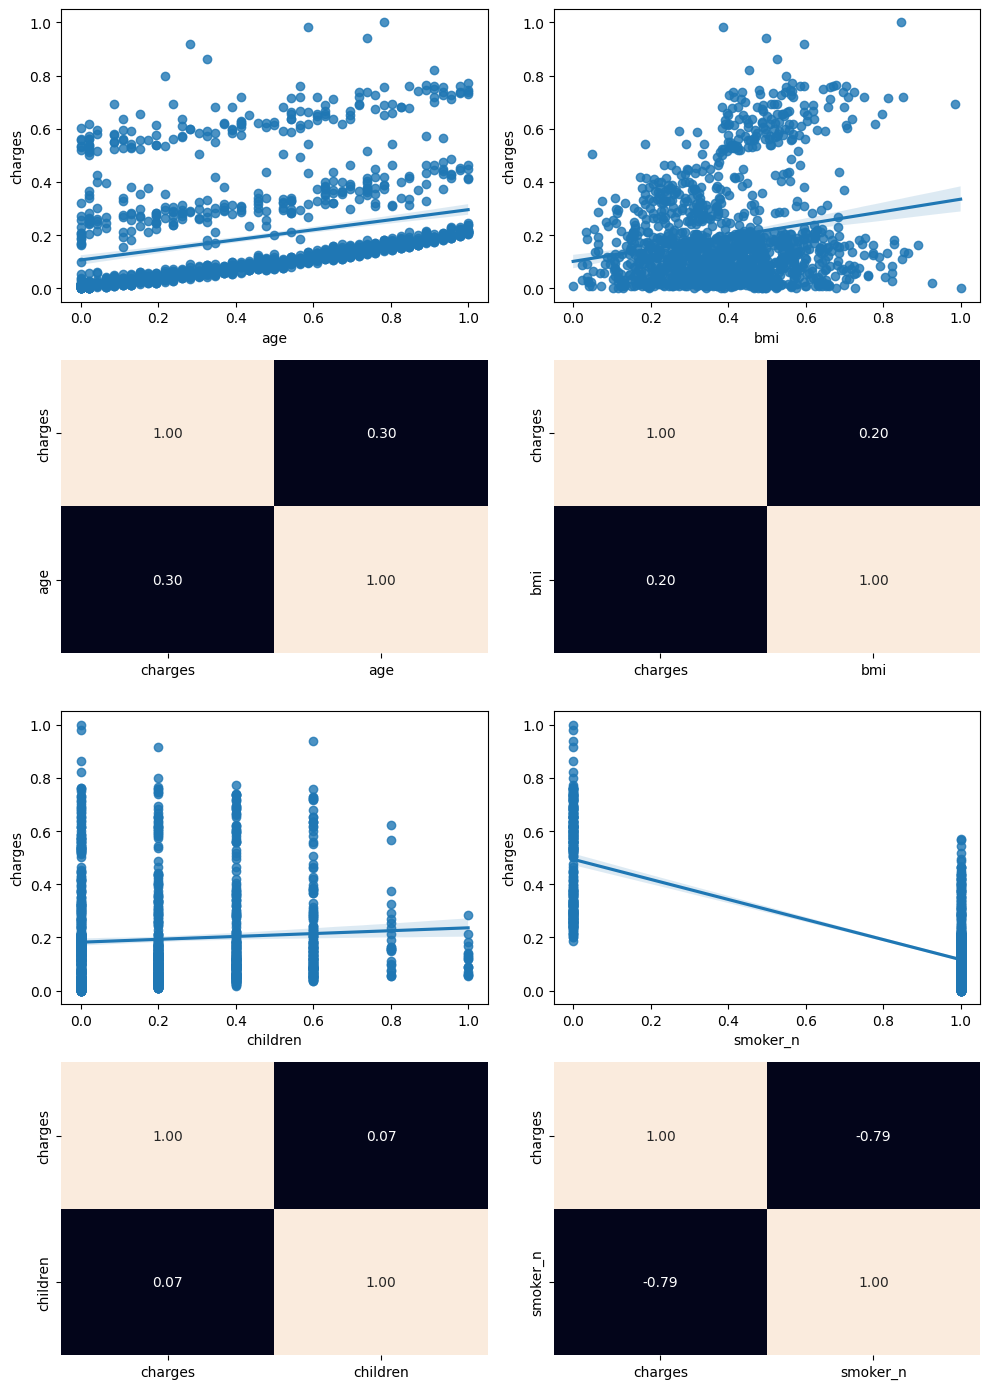

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
data = pd.concat([train_data, test_data])

sns.regplot(data = data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [13]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [16]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.009150574110332004
R2 Score: 0.8045531086669286
